In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\PMLS\Downloads\archive (3)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick overview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Total number of employees
total_employees = df.shape[0]

# Employees who left
left_employees = df[df['Attrition'] == 'Yes'].shape[0]

# Print results
print("👥 Total Employees:", total_employees)
print("❌ Employees who left:", left_employees)
print("📉 Attrition Rate: {:.2f}%".format((left_employees / total_employees) * 100))


👥 Total Employees: 1470
❌ Employees who left: 237
📉 Attrition Rate: 16.12%


In [3]:
# Average age of employees who left
avg_age_left = df[df['Attrition'] == 'Yes']['Age'].mean()

# Average age of employees who stayed
avg_age_stayed = df[df['Attrition'] == 'No']['Age'].mean()

# Print results
print("📊 Average Age of Employees who LEFT: {:.1f}".format(avg_age_left))
print("📈 Average Age of Employees who STAYED: {:.1f}".format(avg_age_stayed))


📊 Average Age of Employees who LEFT: 33.6
📈 Average Age of Employees who STAYED: 37.6


In [4]:
# Count of employees by department and attrition
dept_attrition = df.groupby(['Department', 'Attrition']).size().unstack()

# Calculate attrition rate per department
dept_attrition['Attrition Rate (%)'] = (dept_attrition['Yes'] / dept_attrition.sum(axis=1)) * 100

# Show result
dept_attrition[['Attrition Rate (%)']].sort_values(by='Attrition Rate (%)', ascending=False)


Attrition,Attrition Rate (%)
Department,
Sales,20.627803
Human Resources,19.047619
Research & Development,13.839750


In [5]:
# Calculate average distance for both groups
distance_left = df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()
distance_stayed = df[df['Attrition'] == 'No']['DistanceFromHome'].mean()

# Print results
print("📍 Avg. Distance (Left Employees): {:.1f} km".format(distance_left))
print("🏠 Avg. Distance (Stayed Employees): {:.1f} km".format(distance_stayed))


📍 Avg. Distance (Left Employees): 10.6 km
🏠 Avg. Distance (Stayed Employees): 8.9 km


In [6]:
# Cross-tabulation of Overtime and Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

# Show percentage of employees who left by overtime status
print("📊 Overtime vs. Attrition Rate (%):")
print(overtime_attrition)


📊 Overtime vs. Attrition Rate (%):
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [7]:
# Average Monthly Income comparison
income_left = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
income_stayed = df[df['Attrition'] == 'No']['MonthlyIncome'].mean()

# Print results
print("💰 Avg. Monthly Income (Left Employees): {:.2f}".format(income_left))
print("💼 Avg. Monthly Income (Stayed Employees): {:.2f}".format(income_stayed))


💰 Avg. Monthly Income (Left Employees): 4787.09
💼 Avg. Monthly Income (Stayed Employees): 6832.74


In [8]:
# Check missing values
print("\n🧹 Missing Values in Dataset:")
print(df.isnull().sum())



🧹 Missing Values in Dataset:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


C:\Users\PMLS\AppData\Local\Temp\ipykernel_20104\3411811089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


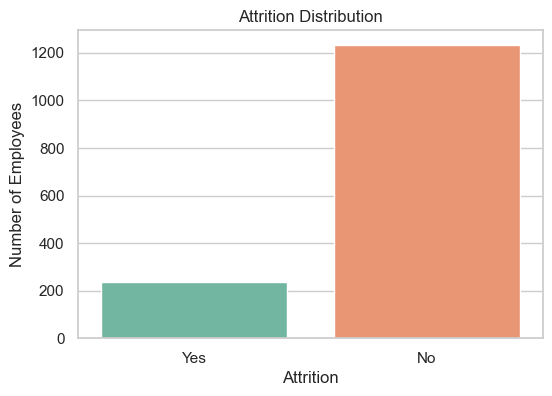

In [10]:
# Bar chart: Attrition count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.ylabel("Number of Employees")
plt.xlabel("Attrition")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_20104\2822397342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')


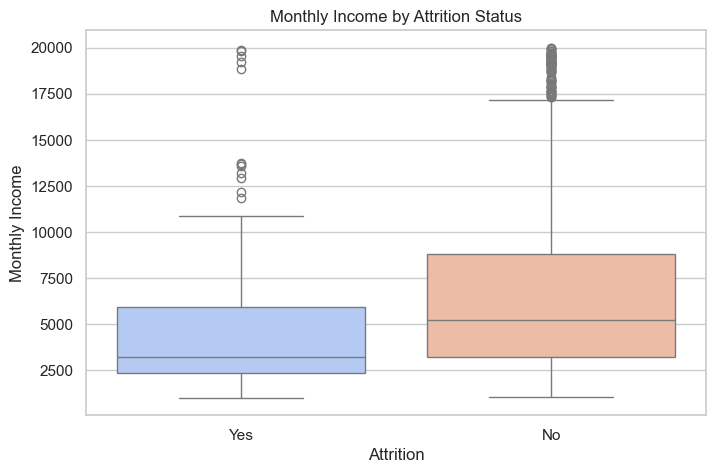

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='coolwarm')
plt.title("Monthly Income by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()


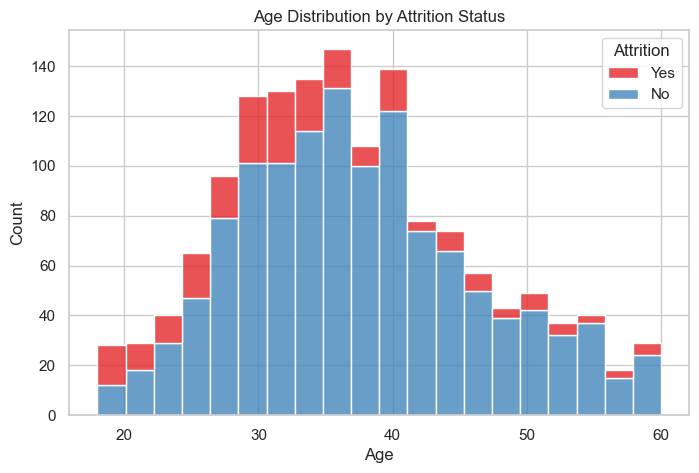

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", palette="Set1", bins=20)
plt.title("Age Distribution by Attrition Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


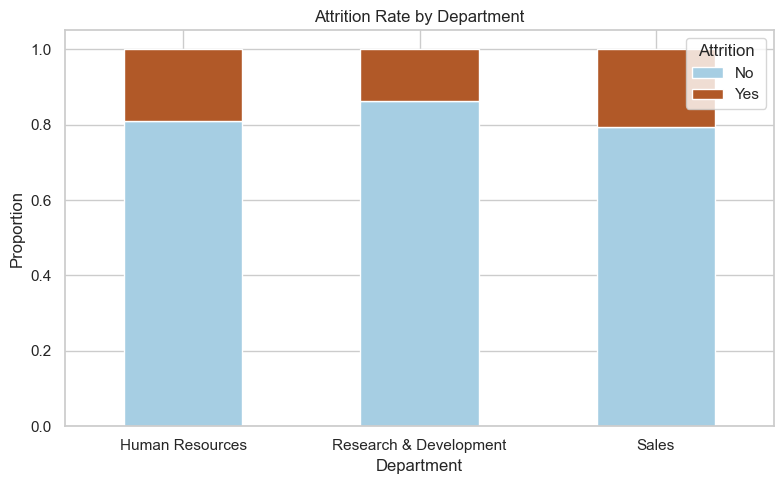

In [13]:
# Create crosstab
dept_attr = pd.crosstab(df['Department'], df['Attrition'])

# Normalize to get percentages
dept_attr_norm = dept_attr.div(dept_attr.sum(axis=1), axis=0)

# Plot
dept_attr_norm.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title("Attrition Rate by Department")
plt.ylabel("Proportion")
plt.xlabel("Department")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


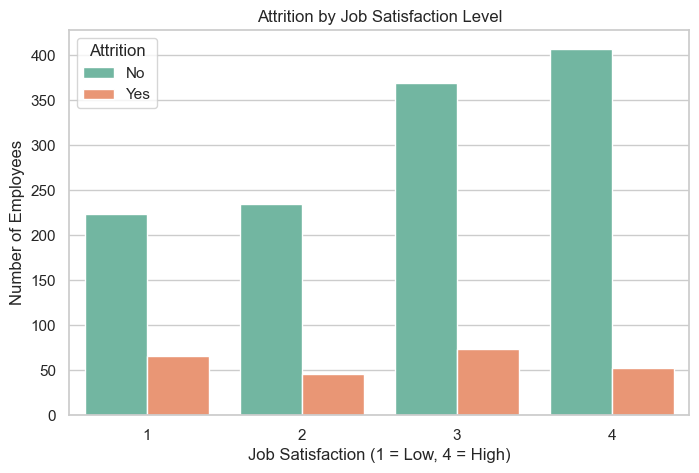

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Set2')
plt.title("Attrition by Job Satisfaction Level")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Number of Employees")
plt.legend(title="Attrition")
plt.show()


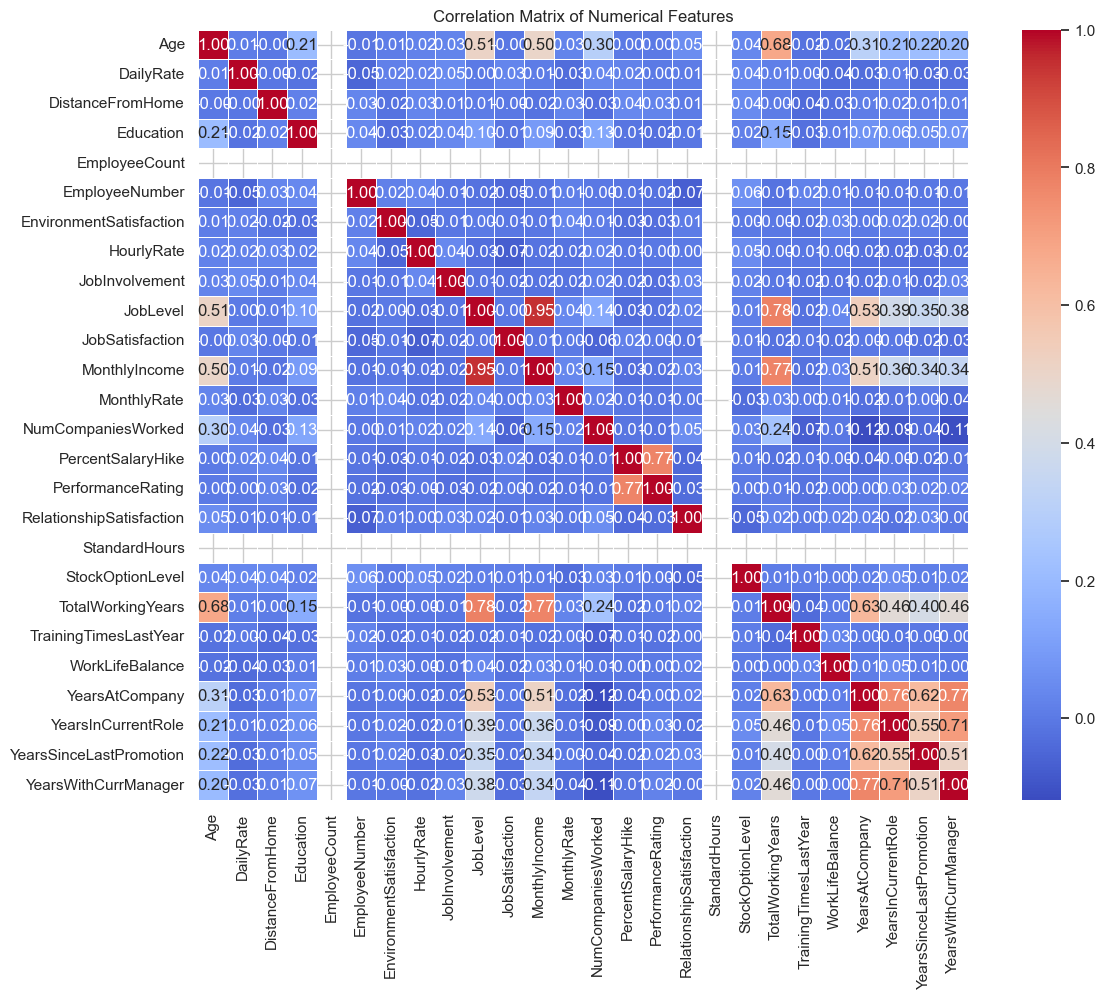

In [15]:
# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np


In [17]:
# Make a copy to work with
data = df.copy()

# Label Encode binary categorical columns
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])  # Yes=1, No=0
data['OverTime'] = le.fit_transform(data['OverTime'])    # Yes=1, No=0

# One-hot encode remaining categorical variables
data = pd.get_dummies(data, drop_first=True)

# Features and target
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Initialize and train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred_lr = logreg.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("🔹 Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))

# Confusion Matrix
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 85.03%

🧩 Confusion Matrix:
[[245   2]
 [ 42   5]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294



C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Initialize and train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))

# Confusion Matrix
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf))


🌲 Random Forest Accuracy: 84.35%

🧩 Confusion Matrix:
[[244   3]
 [ 43   4]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294



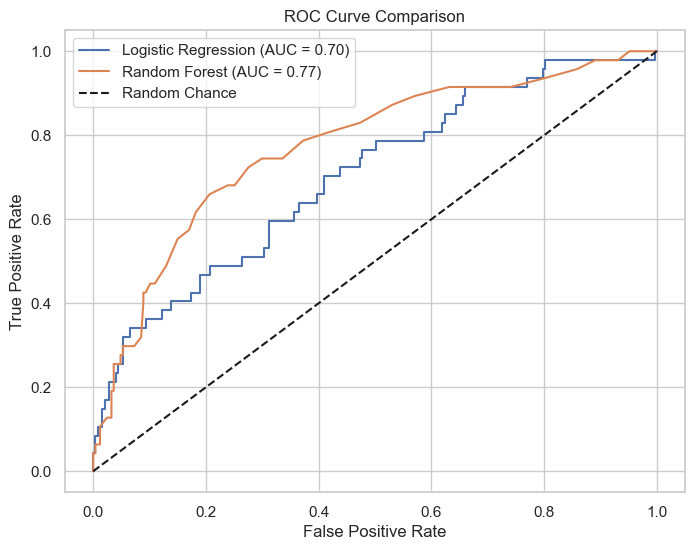

In [20]:
# Get predicted probabilities
y_prob_lr = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Compute AUC
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
